In [193]:
# 데이터 불러오기 & 컬럼 정의
import pandas as pd
addr = 'C:/Users/user/Desktop/python2/superstore_data.csv'
sp=pd.read_csv(addr)
sp = sp.dropna()
sp['Age'] = 2015-sp['Year_Birth']
a = []
for i in sp['Age']:
    if i < 30:
        a.append('20th')
    elif i < 40:
        a.append('30th')
    elif i < 50:
        a.append('40th')
    elif i < 60:
        a.append('50th')
    elif i < 70:
        a.append('60th')
    elif i < 80:
        a.append('70th')
    else :
        a.append('80th')
sp['N_Age'] = a
sp['MntTotal'] = sp['MntWines'] + sp['MntFruits'] + sp['MntMeatProducts'] + sp['MntFishProducts'] + sp['MntSweetProducts'] + sp['MntGoldProds']

In [592]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [195]:
# 그룹핑
sp['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [196]:
sp['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

In [197]:
a = sp['Income'].groupby(sp['Marital_Status'])
a.mean().sort_values()

Marital_Status
Alone       43789.000000
YOLO        48432.000000
Single      50995.350318
Married     51724.978996
Divorced    52834.228448
Together    53245.534031
Widow       56481.552632
Absurd      72365.500000
Name: Income, dtype: float64

In [198]:
sp['N_Age'].value_counts()

N_Age
40th    678
30th    502
50th    485
60th    338
20th    187
70th     23
80th      3
Name: count, dtype: int64

In [199]:
a = []
for i in sp['N_Age'].value_counts().sort_index():
    a.append(round((i/2216 * 100),2))
print(f' 나이 분포 비율 \n 20대 : {a[0]} % \n 30대 : {a[1]} % \n 40대 : {a[2]} % \n 50대 : {a[3]} % \n 60대 : {a[4]} % \n 70대 : {a[5]} % \n 80대 : {a[6]} % ')

 나이 분포 비율 
 20대 : 8.44 % 
 30대 : 22.65 % 
 40대 : 30.6 % 
 50대 : 21.89 % 
 60대 : 15.25 % 
 70대 : 1.04 % 
 80대 : 0.14 % 


In [200]:
sp['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [201]:
# Q1 - 1.5 IQR < x < Q3 + 1.5 IQR
# IQR = Q3 - Q1
# 이상치 구하기
import numpy as np
Income_per = np.percentile(sp['Income'],q=[25,75])
Income_Q1 = Income_per[0]
Income_Q3 = Income_per[1]
Income_IQR = Income_Q3-Income_Q1
Income_Min = Income_Q1 - 1.5 * Income_IQR
Income_Max = Income_Q3 + 1.5 * Income_IQR
print(Income_Min,Income_Max)

-14525.5 118350.5


In [202]:
sp['MntTotal'] = sp['MntWines'] + sp['MntFruits'] + sp['MntMeatProducts'] + sp['MntFishProducts'] + sp['MntSweetProducts'] + sp['MntGoldProds']
sp
sp[sp['MntTotal']>=2495]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,N_Age,MntTotal
671,5735,1991,Master,Single,90638.0,0,0,2/13/2014,29,1156,...,1,3,4,10,1,0,0,24,20th,2525
672,5350,1991,Master,Single,90638.0,0,0,2/13/2014,29,1156,...,1,3,4,10,1,1,0,24,20th,2525
1404,1763,1988,Graduation,Together,87679.0,0,0,7/27/2013,62,1259,...,1,7,11,10,4,1,0,27,20th,2524


In [203]:
# 연도 확인
a = []
for i in sp['Dt_Customer']:
    a.append(i.split('/')[2])
a.sort(reverse=True)
a[:11]

['2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014']

In [204]:
sp['N_Age'][sp['Response']==1].value_counts()

N_Age
40th    106
30th     77
50th     61
60th     52
20th     32
70th      5
Name: count, dtype: int64

In [205]:
len(sp['N_Age'][sp['Response']==1])

333

In [206]:
a = []
for i in sp['N_Age'][sp['Response']==1].value_counts().sort_index():
    a.append(round((i/333 * 100),2))
print(f' 나이 분포 비율 \n 20대 : {a[0]} % \n 30대 : {a[1]} % \n 40대 : {a[2]} % \n 50대 : {a[3]} % \n 60대 : {a[4]} % \n 70대 : {a[5]} % \n 80대 : 0 %')

 나이 분포 비율 
 20대 : 9.61 % 
 30대 : 23.12 % 
 40대 : 31.83 % 
 50대 : 18.32 % 
 60대 : 15.62 % 
 70대 : 1.5 % 
 80대 : 0 %


In [207]:
a = sp['NumDealsPurchases'].groupby(sp['N_Age'])
b = a.sum()
b

N_Age
20th     302
30th    1085
40th    1746
50th    1197
60th     790
70th      26
80th       3
Name: NumDealsPurchases, dtype: int64

In [208]:
c = []
for i in b:
    c.append(round((i/2216 * 100),2))
print(f' 나이 분포 비율 \n 20대 : {c[0]} % \n 30대 : {c[1]} % \n 40대 : {c[2]} % \n 50대 : {c[3]} % \n 60대 : {c[4]} % \n 70대 : {c[5]} % \n 80대 : {c[6]}0 %')

 나이 분포 비율 
 20대 : 13.63 % 
 30대 : 48.96 % 
 40대 : 78.79 % 
 50대 : 54.02 % 
 60대 : 35.65 % 
 70대 : 1.17 % 
 80대 : 0.140 %


In [209]:
Income_per = np.percentile(sp['Income'],q=[25,75])
Income_Q1 = Income_per[0]
Income_Q3 = Income_per[1]
Income_IQR = Income_Q3-Income_Q1
Income_Min = Income_Q1 - 1.5 * Income_IQR
Income_Max = Income_Q3 + 1.5 * Income_IQR
print(Income_Min,Income_Max)

-14525.5 118350.5


In [210]:
sp = sp.loc[sp['Income'] <= Income_Max]
len(sp)

2208

In [211]:
Age_per = np.percentile(sp['Age'],q=[25,75])
Age_Q1 = Age_per[0]
Age_Q3 = Age_per[1]
Age_IQR = Age_Q3-Age_Q1
Age_Min = Age_Q1 - 1.5 * Age_IQR
Age_Max = Age_Q3 + 1.5 * Age_IQR
print(Age_Min,Age_Max)

11.0 83.0


In [212]:
sp = sp.loc[sp['Age'] <= Age_Max]
len(sp)

2205

In [213]:
sp['Marital_Status']

0       Divorced
1         Single
2        Married
3       Together
4         Single
          ...   
2235    Divorced
2236     Married
2237    Divorced
2238     Married
2239     Married
Name: Marital_Status, Length: 2205, dtype: object

In [214]:
addr = 'C:/Users/user/Desktop/python2/superstore_data.csv'
sp=pd.read_csv(addr)
sp = sp.dropna()
sp['Age'] = 2015-sp['Year_Birth']
a = []
for i in sp['Age']:
    if i < 30:
        a.append('20th')
    elif i < 40:
        a.append('30th')
    elif i < 50:
        a.append('40th')
    elif i < 60:
        a.append('50th')
    elif i < 70:
        a.append('60th')
    elif i < 80:
        a.append('70th')
    else :
        a.append('80th')
sp['N_Age'] = a
# Income
Income_per = np.percentile(sp['Income'],q=[25,75])
Income_Q1 = Income_per[0]
Income_Q3 = Income_per[1]
Income_IQR = Income_Q3-Income_Q1
Income_Min = Income_Q1 - 1.5 * Income_IQR
Income_Max = Income_Q3 + 1.5 * Income_IQR
print(Income_Min,Income_Max)
# Age
Age_per = np.percentile(sp['Age'],q=[25,75])
Age_Q1 = Age_per[0]
Age_Q3 = Age_per[1]
Age_IQR = Age_Q3-Age_Q1
Age_Min = Age_Q1 - 1.5 * Age_IQR
Age_Max = Age_Q3 + 1.5 * Age_IQR
print(Age_Min,Age_Max)
outlier = sp.loc[(sp['Income'] > Income_Max) | (sp['Age'] > Age_Max)]
sp = sp.loc[sp['Income'] <= Income_Max]
sp = sp.loc[sp['Age'] <= Age_Max]
length = len(sp)
sp['MntTotal'] = sp['MntWines'] + sp['MntFruits'] + sp['MntMeatProducts'] + sp['MntFishProducts'] + sp['MntSweetProducts'] + sp['MntGoldProds']
a = []
for i in sp['Marital_Status']:
    if i == 'Married' or i == 'Together':
        a.append(2)
    else :
        a.append(1)
sp['Adulthome'] = a
sp['Home_Member'] = sp['Adulthome']+sp['Kidhome']+sp['Teenhome']
sp

-14525.5 118350.5
11.0 83.0


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,N_Age,MntTotal,Adulthome,Home_Member
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,4,6,1,1,0,45,40th,1190,1,1
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,3,7,5,1,0,54,50th,577,1,1
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,2,5,2,0,0,57,50th,251,2,3
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,2,7,0,0,48,40th,11,2,4
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,1,2,7,1,0,26,20th,91,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,2,11,4,0,0,39,30th,689,1,2
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,0,3,8,0,0,38,30th,55,2,3
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,1,5,8,0,0,39,30th,309,1,2
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,4,10,3,0,0,37,30th,1383,2,2


,MntTotal,Income
MntTotal,1.00000,0.82377
Income,0.82377,1.00000


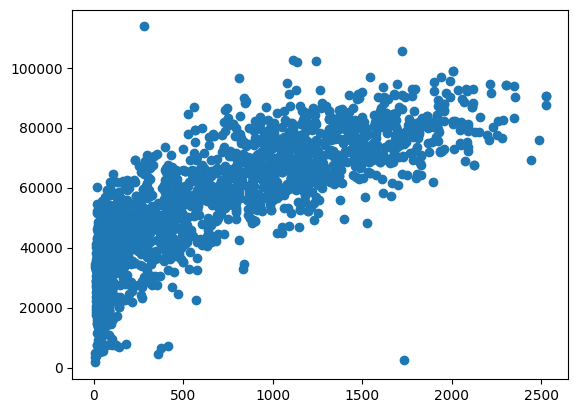

In [215]:
# 상관계수와 산점도
a = sp[['MntTotal', 'Income']].corr()
display(a)
x = sp['MntTotal']
y = sp['Income']
plt.scatter(x, y)

In [216]:
a = sp[['MntTotal','Home_Member']].corr()
display(a)
b = sp[['Income','Home_Member']].corr()
display(b)

,MntTotal,Home_Member
MntTotal,1.000000,-0.426015
Home_Member,-0.426015,1.000000


,Income,Home_Member
Income,1.000000,-0.296186
Home_Member,-0.296186,1.000000


In [217]:
sp['Sonhome'] = sp['Kidhome']+sp['Teenhome']
sp


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,N_Age,MntTotal,Adulthome,Home_Member,Sonhome
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,6,1,1,0,45,40th,1190,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,5,1,0,54,50th,577,1,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,5,2,0,0,57,50th,251,2,3,1
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,2,7,0,0,48,40th,11,2,4,2
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,2,7,1,0,26,20th,91,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,11,4,0,0,39,30th,689,1,2,1
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,0,0,38,30th,55,2,3,1
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,5,8,0,0,39,30th,309,1,2,1
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,10,3,0,0,37,30th,1383,2,2,0


In [218]:
print(sp[sp['Sonhome']>=1]['NumDealsPurchases'].mean())
print(sp[sp['Sonhome']==0]['NumDealsPurchases'].mean())

2.793278376664553
1.125796178343949


In [219]:
print(sp[sp['Sonhome']>=1]['Income'].mean())
print(sp[sp['Sonhome']==0]['Income'].mean())

46257.08623969562
65094.41719745223


,Age,Income
Age,1.000000,0.212625
Income,0.212625,1.000000


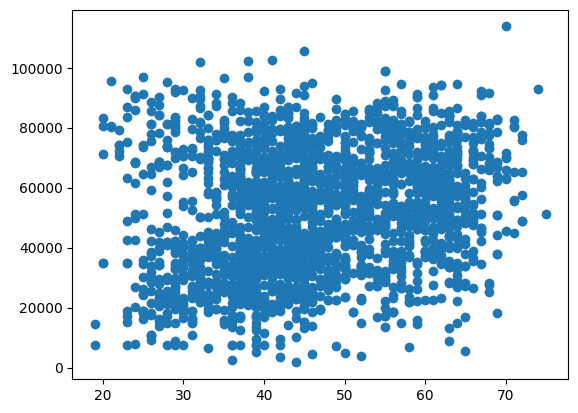

In [220]:
# 상관계수와 산점도
a = sp[['Age', 'Income']].corr()
display(a)
x = sp['Age']
y = sp['Income']
plt.scatter(x, y)

Online_Purchase             OffLine_Purchase              \
                   mean   std count             mean   std count   
Sonhome                                                            
0                  4.43  2.47   628            12.02  5.27   628   
1                  4.28  2.87  1112             7.76  4.97  1112   
2                  3.26  2.59   415             5.43  3.35   415   
3                  2.82  2.39    50             4.76  2.80    50   

        NumDealsPurchases              
                     mean   std count  
Sonhome                                
0                    1.13  0.94   628  
1                    2.47  1.54  1112  
2                    3.57  2.51   415  
3                    3.60  2.73    50

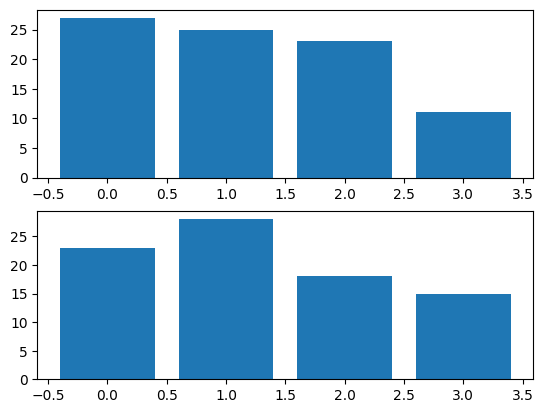

In [221]:
# 이거 부터
sp['OffLine_Purchase'] = sp['NumCatalogPurchases'] + sp['NumStorePurchases']
sp['Online_Purchase'] = sp['NumWebPurchases']

a = sp[['Sonhome', 'Online_Purchase', 'OffLine_Purchase', 'NumDealsPurchases']]
p = a.groupby('Sonhome').agg(['mean', 'std', 'count']).round(2)

display(p)

x1 = sp['Sonhome']
y1 = sp['Online_Purchase']
y2 = sp['OffLine_Purchase']

fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1) 
ax2 = fig.add_subplot(2, 1, 2)

ax1.bar(x1, y1)
ax2.bar(x1, y2)

plt.show()

In [222]:
sp['MntTotal'].sort_values(ascending=False)

672     2525
671     2525
1404    2524
1026    2486
1864    2440
        ... 
1472       8
1466       8
32         8
456        6
1291       5
Name: MntTotal, Length: 2205, dtype: int64

In [223]:
a = []
for i in sp['Education']:
    if i == 'Basic':
        a.append(1)
    elif i == 'Graduation':
        a.append(2)
    elif i == '2n Cycle':
        a.append(3)
    elif i == 'Master':
        a.append(4)
    else:
        a.append(5)
sp['N_Edu'] = a
sp

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Age,N_Age,MntTotal,Adulthome,Home_Member,Sonhome,OffLine_Purchase,Online_Purchase,N_Edu
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,0,45,40th,1190,1,1,0,10,4,2
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,0,54,50th,577,1,1,0,10,7,2
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,0,57,50th,251,2,3,1,7,3,2
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,48,40th,11,2,4,2,2,1,2
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,0,26,20th,91,1,2,1,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,0,39,30th,689,1,2,1,13,5,5
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,0,38,30th,55,2,3,1,3,1,3
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,0,39,30th,309,1,2,1,6,6,2
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,0,37,30th,1383,2,2,0,14,5,2


In [224]:
sp['Dt_Customer'][0]

'6/16/2014'

In [225]:
sp['Education'].value_counts()

Education
Graduation    1113
PhD            476
Master         364
2n Cycle       198
Basic           54
Name: count, dtype: int64

In [226]:
import datetime as dt
a = []
b = []
for i in sp['Dt_Customer']:
    a = dt.datetime.strptime(i,'%m/%d/%Y')
    b.append(f'{a.year}-{a.month}-{a.day}')
b
sp['N_Dt'] = b

In [227]:
sp['Purchases']=sp['NumWebPurchases']+sp['NumCatalogPurchases']+sp['NumStorePurchases']

In [228]:
display(sp)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,N_Age,MntTotal,Adulthome,Home_Member,Sonhome,OffLine_Purchase,Online_Purchase,N_Edu,N_Dt,Purchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,40th,1190,1,1,0,10,4,2,2014-6-16,14
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,50th,577,1,1,0,10,7,2,2014-6-15,17
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,50th,251,2,3,1,7,3,2,2014-5-13,10
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,40th,11,2,4,2,2,1,2,2014-11-5,3
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,20th,91,1,2,1,3,3,2,2014-8-4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,30th,689,1,2,1,13,5,5,2013-7-3,18
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,30th,55,2,3,1,3,1,3,2013-1-22,4
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,30th,309,1,2,1,6,6,2,2012-3-12,12
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,30th,1383,2,2,0,14,5,2,2012-11-29,19


In [229]:
sp[sp['Response']==1][['Year_Birth','Age','N_Edu','Income','Home_Member','Adulthome','Sonhome','Recency','MntTotal']].describe()

,Year_Birth,Age,N_Edu,Income,Home_Member,Adulthome,Sonhome,Recency,MntTotal
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,1969.495495,45.504505,3.306306,60209.675676,2.123123,1.474474,0.648649,35.264264,985.660661
std,12.331667,12.331667,1.331677,23194.080987,0.937749,0.500099,0.740180,27.615407,719.393948
min,1943.000000,19.000000,1.000000,7500.000000,1.000000,1.000000,0.000000,0.000000,17.000000
25%,1959.000000,36.000000,2.000000,39763.000000,1.000000,1.000000,0.000000,11.000000,252.000000
50%,1971.000000,44.000000,3.000000,64090.000000,2.000000,1.000000,0.000000,30.000000,1053.000000
75%,1979.000000,56.000000,5.000000,80589.000000,3.000000,2.000000,1.000000,56.000000,1617.000000
max,1996.000000,72.000000,5.000000,105471.000000,5.000000,2.000000,3.000000,99.000000,2525.000000


In [230]:
sp[sp['Response']==0][['Year_Birth','Age','N_Edu','Income','Home_Member','Adulthome','Sonhome','Recency','MntTotal']].describe()

,Year_Birth,Age,N_Edu,Income,Home_Member,Adulthome,Sonhome,Recency,MntTotal
count,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000
mean,1968.799145,46.200855,2.996261,50094.496261,2.677350,1.675214,1.002137,51.454060,539.432158
std,11.591213,11.591213,1.261394,19861.274944,0.874583,0.468420,0.738348,28.480192,551.837015
min,1940.000000,19.000000,1.000000,1730.000000,1.000000,1.000000,0.000000,0.000000,5.000000
25%,1959.000000,38.000000,2.000000,34379.250000,2.000000,1.000000,1.000000,27.000000,62.000000
50%,1970.000000,45.000000,2.000000,50008.000000,3.000000,2.000000,1.000000,52.000000,315.000000
75%,1977.000000,56.000000,4.000000,65876.500000,3.000000,2.000000,1.000000,76.000000,957.000000
max,1996.000000,75.000000,5.000000,113734.000000,5.000000,2.000000,3.000000,99.000000,2525.000000


In [231]:
sp['N_Dt']

0        2014-6-16
1        2014-6-15
2        2014-5-13
3        2014-11-5
4         2014-8-4
           ...    
2235      2013-7-3
2236     2013-1-22
2237     2012-3-12
2238    2012-11-29
2239      2012-1-9
Name: N_Dt, Length: 2205, dtype: object

In [232]:
# 8:2 80의 매출이 20의 고객에서 나온다
Mnt_Sum = sp['MntTotal'].sum()
Mnt_80 = Mnt_Sum * 0.8
Mem_20 = int(sp['Id'].count() * 0.2)
abc = round(Mnt_80 / Mem_20,2)
abc

2427.29

In [233]:
sp[sp['MntTotal']>=abc]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,N_Age,MntTotal,Adulthome,Home_Member,Sonhome,OffLine_Purchase,Online_Purchase,N_Edu,N_Dt,Purchases
671,5735,1991,Master,Single,90638.0,0,0,2/13/2014,29,1156,...,20th,2525,1,1,0,14,3,4,2014-2-13,17
672,5350,1991,Master,Single,90638.0,0,0,2/13/2014,29,1156,...,20th,2525,1,1,0,14,3,4,2014-2-13,17
1026,4580,1969,Graduation,Married,75759.0,0,0,10/25/2013,46,1394,...,40th,2486,2,2,0,16,9,2,2013-10-25,25
1404,1763,1988,Graduation,Together,87679.0,0,0,7/27/2013,62,1259,...,20th,2524,2,2,0,21,7,2,2013-7-27,28
1864,4475,1949,PhD,Married,69098.0,0,0,2/16/2013,82,1315,...,60th,2440,2,2,0,17,7,5,2013-2-16,24


In [234]:
sp['Purchases'].mean()

12.569614512471656

<BarContainer object of 100 artists>

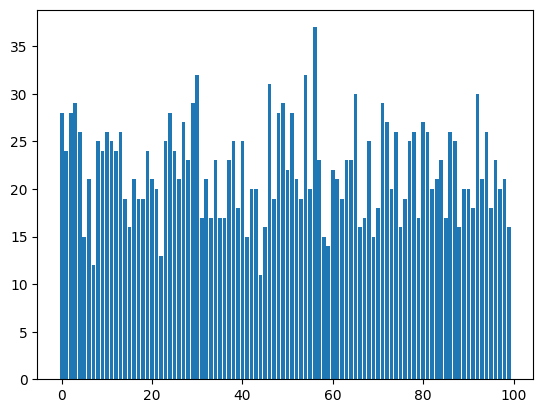

In [235]:
x = range(100)
y = sp['Recency'].value_counts().sort_index()
plt.bar(x, y)

In [236]:
a = []
for i in sp['Recency']:
    if i < 7:
        a.append('a1_week')
    elif i < 14:
        a.append('b2_weeks')
    elif i < 21:
        a.append('c3_weeks')
    elif i < 30:
        a.append('d1_month')
    elif i < 60:
        a.append('e2_months')
    else :
        a.append('f2_months_over')
sp['N_Recency'] = a
sp['N_Recency'].value_counts().sort_index()

N_Recency
a1_week           171
b2_weeks          162
c3_weeks          139
d1_month          210
e2_months         655
f2_months_over    868
Name: count, dtype: int64

In [237]:
# Response별 Recency 비율
spresY=sp[sp['Response']==1]

In [238]:
spresN=sp[sp['Response']==0]

In [239]:
# Response별 Recency 비율
a = []
for i in spresY['N_Recency'].value_counts().sort_index():
    a.append(round(i/spresY['Id'].count()*100,2))
print(f' 최근 방문 기간 비율 \n 1주일 내 : {a[0]} % \n 2주일 내 : {a[1]} % \n 1달 내 : {a[2]} % \n 2달 내 : {a[3]} % \n 2달 이상 : {a[4]}')

 최근 방문 기간 비율 
 1주일 내 : 14.41 % 
 2주일 내 : 16.22 % 
 1달 내 : 10.21 % 
 2달 내 : 9.01 % 
 2달 이상 : 27.03


In [240]:
a = []
for i in spresN['N_Recency'].value_counts().sort_index():
    a.append(round(i/spresN['Id'].count()*100,2))
print(f' 최근 방문 기간 비율 \n 1주일 내 : {a[0]} % \n 2주일 내 : {a[1]} % \n 1달 내 : {a[2]} % \n 2달 내 : {a[3]} % \n 2달 이상 : {a[4]}')

 최근 방문 기간 비율 
 1주일 내 : 6.57 % 
 2주일 내 : 5.77 % 
 1달 내 : 5.61 % 
 2달 내 : 9.62 % 
 2달 이상 : 30.18


In [241]:
sp['MntTotal'].value_counts().sort_index()

MntTotal
5       1
6       1
8       3
9       2
10      5
       ..
2352    1
2440    1
2486    1
2524    1
2525    2
Name: count, Length: 1045, dtype: int64

<Axes: xlabel='Recency'>

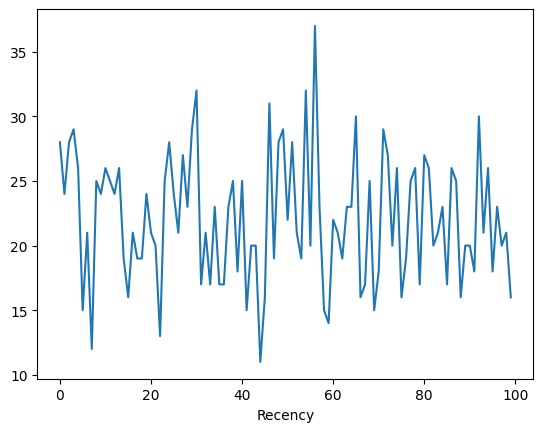

In [242]:
sp.groupby('Recency')['Id'].count().plot()

In [243]:
a = []
for i,j in zip(sp['MntTotal'],sp['Purchases']):
    if j == 0:
        a.append(round(i/1,2))
    else :
        a.append(round(i/j,2))
sp['Cus_Trans'] = a

In [244]:
sp['Cus_Trans']

0       85.00
1       33.94
2       25.10
3        3.67
4       15.17
        ...  
2235    38.28
2236    13.75
2237    25.75
2238    72.79
2239    63.41
Name: Cus_Trans, Length: 2205, dtype: float64

In [245]:
round(sp['MntTotal'].sort_values(ascending=False).head(int(sp['Id'].count()*0.2)).sum()/Mnt_Sum*100,2)

52.19

In [246]:
Mnt_80

1070433.6

In [247]:
sp['MntTotal'].sort_values(ascending=False).head(int(sp['Id'].count()*0.378)).sum()

1070417

In [248]:
sp['Purchases']=sp['NumWebPurchases']+sp['NumCatalogPurchases']+sp['NumStorePurchases']

In [249]:
sp['MntTotal'].sort_values(ascending=False).head(int(sp['Id'].count()*0.378))

672     2525
671     2525
1404    2524
1026    2486
1864    2440
        ... 
1922     715
83       714
820      711
655      710
1973     708
Name: MntTotal, Length: 833, dtype: int64

In [250]:
a = sp[sp['MntTotal']>=708]['Response'].value_counts()
b = int(sp['Id'].count()*0.378)
print(f' 상위 37.8 % 고객의 Response\n 응답 X : {round(a[0]/b*100,2)} % \n 응답 O : {round(a[1]/b*100,2)} %')

 상위 37.8 % 고객의 Response
 응답 X : 76.47 % 
 응답 O : 23.53 %


In [251]:
sp['MntTotal'].sort_values(ascending=False).head(int(sp['Id'].count()*0.4))

672     2525
671     2525
1404    2524
1026    2486
1864    2440
        ... 
1094     641
528      639
488      638
555      637
1994     637
Name: MntTotal, Length: 882, dtype: int64

In [252]:
a = sp[sp['MntTotal']>=637]['Response'].value_counts()
b = int(sp['Id'].count()*0.4)
print(f' 상위 40 % 고객의 Response\n 응답 X : {round(a[0]/b*100,2)} % \n 응답 O : {round(a[1]/b*100,2)} %')

 상위 40 % 고객의 Response
 응답 X : 77.21 % 
 응답 O : 22.79 %


In [253]:
sp['MntTotal'].sort_values(ascending=False).head(int(sp['Id'].count()*0.5))

672     2525
671     2525
1404    2524
1026    2486
1864    2440
        ... 
1129     401
1378     401
64       400
320      398
2113     397
Name: MntTotal, Length: 1102, dtype: int64

In [254]:
a = sp[sp['MntTotal']>=397]['Response'].value_counts()
b = int(sp['Id'].count()*0.5)
print(f' 상위 50 % 고객의 Response\n 응답 X : {round(a[0]/b*100,2)} % \n 응답 O : {round(a[1]/b*100,2)} %')

 상위 50 % 고객의 Response
 응답 X : 79.04 % 
 응답 O : 21.14 %


In [255]:
sp['MntTotal'].sort_values(ascending=False).head(int(sp['Id'].count()*0.2))

672     2525
671     2525
1404    2524
1026    2486
1864    2440
        ... 
105     1178
106     1178
519     1175
1437    1174
1438    1174
Name: MntTotal, Length: 441, dtype: int64

In [256]:
a = sp[sp['MntTotal']>=1174]['Response'].value_counts()
b = int(sp['Id'].count()*0.2)
print(f' 상위 20 % 고객의 Response\n 응답 X : {round(a[0]/b*100,2)} % \n 응답 O : {round(a[1]/b*100,2)} %')

 상위 20 % 고객의 Response
 응답 X : 66.21 % 
 응답 O : 34.01 %


In [257]:
spresY[['Age','N_Edu','Income','Home_Member','Adulthome','Sonhome','Recency','MntTotal']].describe()

,Age,N_Edu,Income,Home_Member,Adulthome,Sonhome,Recency,MntTotal
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,45.504505,3.306306,60209.675676,2.123123,1.474474,0.648649,35.264264,985.660661
std,12.331667,1.331677,23194.080987,0.937749,0.500099,0.740180,27.615407,719.393948
min,19.000000,1.000000,7500.000000,1.000000,1.000000,0.000000,0.000000,17.000000
25%,36.000000,2.000000,39763.000000,1.000000,1.000000,0.000000,11.000000,252.000000
50%,44.000000,3.000000,64090.000000,2.000000,1.000000,0.000000,30.000000,1053.000000
75%,56.000000,5.000000,80589.000000,3.000000,2.000000,1.000000,56.000000,1617.000000
max,72.000000,5.000000,105471.000000,5.000000,2.000000,3.000000,99.000000,2525.000000


In [258]:
spresY

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntTotal,Adulthome,Home_Member,Sonhome,OffLine_Purchase,Online_Purchase,N_Edu,N_Dt,Purchases,N_Recency
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,1190,1,1,0,10,4,2,2014-6-16,14,a1_week
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,577,1,1,0,10,7,2,2014-6-15,17,a1_week
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,91,1,2,1,3,3,2,2014-8-4,6,a1_week
5,7348,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,...,1192,1,1,0,12,4,5,2014-3-17,16,a1_week
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,...,1215,2,2,0,17,10,3,2014-1-29,27,a1_week
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,5153,1967,PhD,Married,77766.0,0,1,2/22/2013,97,1004,...,1529,2,3,1,21,11,5,2013-2-22,32,f2_months_over
2196,4127,1967,PhD,Married,77766.0,0,1,2/22/2013,97,1004,...,1529,2,3,1,21,11,5,2013-2-22,32,f2_months_over
2212,3979,1983,PhD,Divorced,90687.0,0,0,5/22/2013,98,982,...,1779,1,1,0,10,6,5,2013-5-22,16,f2_months_over
2216,7230,1960,PhD,Divorced,50611.0,0,1,4/10/2012,98,459,...,493,1,2,1,12,4,5,2012-4-10,16,f2_months_over


In [259]:
spresN[['Age','N_Edu','Income','Home_Member','Adulthome','Sonhome','Recency','MntTotal']].describe()

,Age,N_Edu,Income,Home_Member,Adulthome,Sonhome,Recency,MntTotal
count,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000
mean,46.200855,2.996261,50094.496261,2.677350,1.675214,1.002137,51.454060,539.432158
std,11.591213,1.261394,19861.274944,0.874583,0.468420,0.738348,28.480192,551.837015
min,19.000000,1.000000,1730.000000,1.000000,1.000000,0.000000,0.000000,5.000000
25%,38.000000,2.000000,34379.250000,2.000000,1.000000,1.000000,27.000000,62.000000
50%,45.000000,2.000000,50008.000000,3.000000,2.000000,1.000000,52.000000,315.000000
75%,56.000000,4.000000,65876.500000,3.000000,2.000000,1.000000,76.000000,957.000000
max,75.000000,5.000000,113734.000000,5.000000,2.000000,3.000000,99.000000,2525.000000


In [260]:
spresN[spresN['MntTotal']>=708]['Id'].count()

637

In [261]:
sp['Cus_Trans'].describe()

count    2205.000000
mean       37.430744
std        30.046388
min         2.670000
25%        13.000000
50%        29.830000
75%        49.050000
max       187.670000
Name: Cus_Trans, dtype: float64

In [262]:
Mnt_70 = Mnt_Sum * 0.7
Mnt_70

936629.3999999999

In [263]:
sp['MntTotal'].sort_values(ascending=False).head(int(sp['Id'].count()*0.3)).sum()

929307

In [264]:
sp['MntTotal'].sort_values(ascending=False).head(int(sp['Id'].count()*0.3))

672     2525
671     2525
1404    2524
1026    2486
1864    2440
        ... 
1635     929
1469     928
1392     928
389      928
1149     928
Name: MntTotal, Length: 661, dtype: int64

In [265]:
a = sp[sp['MntTotal']>=928]['Response'].value_counts()
b = int(sp['Id'].count()*0.3)
print(f' 상위 30 % 고객의 Response\n 응답 X : {round(a[0]/b*100,2)} % \n 응답 O : {round(a[1]/b*100,2)} %')

 상위 30 % 고객의 Response
 응답 X : 74.13 % 
 응답 O : 26.02 %


In [266]:
sp['MntTotal'].sort_values(ascending=False).head(int(sp['Id'].count()*0.15))

672     2525
671     2525
1404    2524
1026    2486
1864    2440
        ... 
639     1345
1030    1341
129     1338
2215    1338
130     1338
Name: MntTotal, Length: 330, dtype: int64

In [267]:
a = sp[sp['MntTotal']>=1338]['Response'].value_counts()
b = int(sp['Id'].count()*0.15)
print(f' 상위 15 % 고객의 Response\n 응답 X : {round(a[0]/b*100,2)} % \n 응답 O : {round(a[1]/b*100,2)} %')

 상위 15 % 고객의 Response
 응답 X : 63.94 % 
 응답 O : 36.36 %


In [268]:
sp['MntTotal'].sort_values(ascending=False).head(int(sp['Id'].count()*0.1))

672     2525
671     2525
1404    2524
1026    2486
1864    2440
        ... 
2155    1538
2154    1538
1444    1536
1658    1536
1396    1533
Name: MntTotal, Length: 220, dtype: int64

In [269]:
a = sp[sp['MntTotal']>=1533]['Response'].value_counts()
b = int(sp['Id'].count()*0.1)
print(f' 상위 10 % 고객의 Response\n 응답 X : {round(a[0]/b*100,2)} % \n 응답 O : {round(a[1]/b*100,2)} %')

 상위 10 % 고객의 Response
 응답 X : 57.27 % 
 응답 O : 42.73 %


In [270]:
sp['MntTotal'].sort_values(ascending=False).head(int(sp['Id'].count()*0.05))

672     2525
671     2525
1404    2524
1026    2486
1864    2440
        ... 
1246    1792
152     1789
2057    1782
135     1782
2212    1779
Name: MntTotal, Length: 110, dtype: int64

In [271]:
a = sp[sp['MntTotal']>=1779]['Response'].value_counts()
b = int(sp['Id'].count()*0.05)
print(f' 상위 5 % 고객의 Response\n 응답 X : {round(a[0]/b*100,2)} % \n 응답 O : {round(a[1]/b*100,2)} %')

 상위 5 % 고객의 Response
 응답 X : 47.27 % 
 응답 O : 52.73 %


In [272]:
a = []
for i in sp['Recency']:
    if i <= 30:
        a.append('cH')
    elif i <= 60:
        a.append('bM')
    else :
        a.append('aL')
sp['HMLRecency'] = a

a = []
for i in sp['MntTotal']:
    if i >= 928:
        a.append('aH')
    elif i >= 397:
        a.append('bM')
    else :
        a.append('cL')
sp['HMLMntTotal'] = a

In [273]:
a = []
for i in sp['MntTotal']:
    if i >= 928:
        a.append('aH')
    elif i >= 397:
        a.append('bM')
    else :
        a.append('cL')
sp['HMLMntTotal'] = a

In [645]:
sp['MntTotal'].sort_values(ascending=False).head(int(sp['Id'].count()*0.3)).sum()

929307

In [644]:
sp['MntTotal'].sum()

1338042

In [640]:
sp['MntTotal'].sort_values(ascending=False).head(int(sp['Id'].count()*0.5))

672     2525
671     2525
1404    2524
1026    2486
1864    2440
        ... 
1129     401
1378     401
64       400
320      398
2113     397
Name: MntTotal, Length: 1102, dtype: int64

In [276]:
sp[['HMLRecency','HMLMntTotal']]

,HMLRecency,HMLMntTotal
0,cH,aH
1,cH,bM
2,cH,cL
3,cH,cL
4,cH,cL
...,...,...
2235,aL,bM
2236,aL,cL
2237,aL,cL
2238,aL,aH


In [277]:
sp['HML'] = sp['HMLRecency'] + sp['HMLMntTotal']
sp['HML'].value_counts()

HML
aLcL    416
cHcL    362
bMcL    323
aLaH    264
cHaH    203
bMaH    195
aLbM    166
cHbM    149
bMbM    127
Name: count, dtype: int64

In [278]:
pdf1 = pd.pivot_table(sp,                # 피벗할 데이터프레임
                     index = 'HMLRecency',    # 행 위치에 들어갈 열
                     columns = 'HMLMntTotal',    # 열 위치에 들어갈 열
                     values = 'HML',     # 데이터로 사용할 열
                     aggfunc = 'count')   # 데이터 집계함수
pdf1

HMLMntTotal,aH,bM,cL
HMLRecency,,,
aL,264,166,416
bM,195,127,323
cH,203,149,362


In [279]:
a = pd.pivot_table(sp, index = 'HMLRecency', columns = 'HMLMntTotal', values = 'HML', aggfunc = 'count')
a

HMLMntTotal,aH,bM,cL
HMLRecency,,,
aL,264,166,416
bM,195,127,323
cH,203,149,362


<Axes: xlabel='HMLMntTotal', ylabel='HMLRecency'>

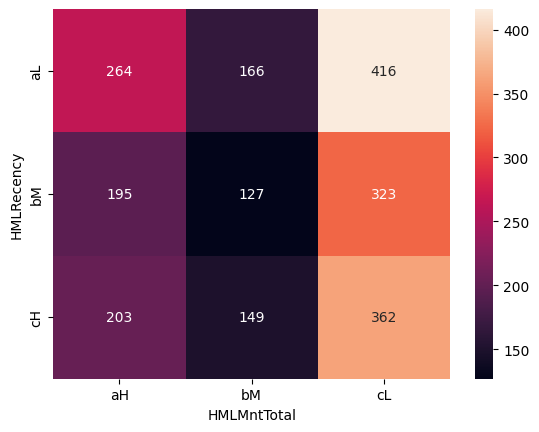

In [280]:
sns.heatmap(a,annot=True,fmt='d')

In [281]:
pdf11 = pd.pivot_table(sp,                # 피벗할 데이터프레임
                     index = 'HMLRecency',    # 행 위치에 들어갈 열
                     columns = 'HMLMntTotal',    # 열 위치에 들어갈 열
                     values = 'HML',     # 데이터로 사용할 열
                     aggfunc = 'count')   # 데이터 집계함수
pdf11

HMLMntTotal,aH,bM,cL
HMLRecency,,,
aL,264,166,416
bM,195,127,323
cH,203,149,362


<Axes: xlabel='HMLMntTotal', ylabel='HMLRecency'>

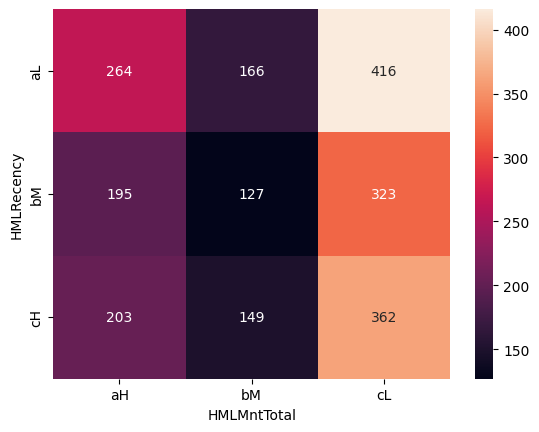

In [282]:
sns.heatmap(pdf11,annot=True,fmt='d')

In [537]:
pdf12 = pd.pivot_table(sp,                # 피벗할 데이터프레임
                     index = 'HMLRecency',    # 행 위치에 들어갈 열
                     columns = 'HMLMntTotal',    # 열 위치에 들어갈 열
                     values = 'Response',     # 데이터로 사용할 열
                     aggfunc = 'mean')   # 데이터 집계함수
pdf12

HMLMntTotal,aH,bM,cL
HMLRecency,,,
aL,0.178030,0.072289,0.028846
bM,0.256410,0.110236,0.077399
cH,0.369458,0.234899,0.174033


In [533]:
sp['HMLRecency']

0        1
1        1
2        1
3        1
4        1
        ..
2235    aL
2236    aL
2237    aL
2238    aL
2239    aL
Name: HMLRecency, Length: 2205, dtype: object

<Axes: xlabel='HMLMntTotal', ylabel='HMLRecency'>

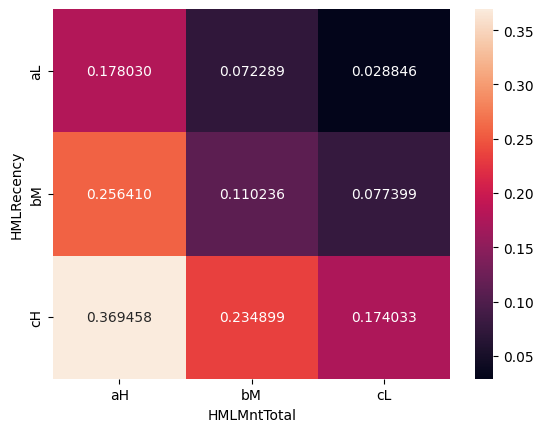

In [538]:
sns.heatmap(pdf12,annot=True,fmt='f')

In [539]:
pdf13 = pd.pivot_table(sp,                # 피벗할 데이터프레임
                     index = 'HMLRecency',    # 행 위치에 들어갈 열
                     columns = 'HMLMntTotal',    # 열 위치에 들어갈 열
                     values = 'Income',     # 데이터로 사용할 열
                     aggfunc = 'mean')   # 데이터 집계함수
pdf13

HMLMntTotal,aH,bM,cL
HMLRecency,,,
aL,73517.041667,57582.150602,35958.836538
bM,73136.856410,58326.921260,34684.507740
cH,74065.256158,60090.429530,36021.226519


<Axes: xlabel='HMLMntTotal', ylabel='HMLRecency'>

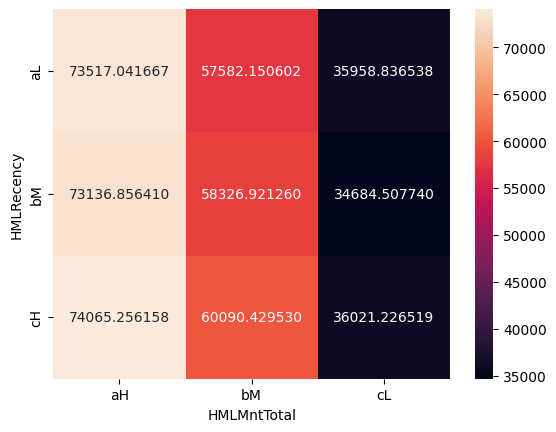

In [540]:
sns.heatmap(pdf13,annot=True,fmt='f')

C:\Users\user\AppData\Local\Temp\ipykernel_13148\3105411971.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spresY, y='Income', palette="Set2")


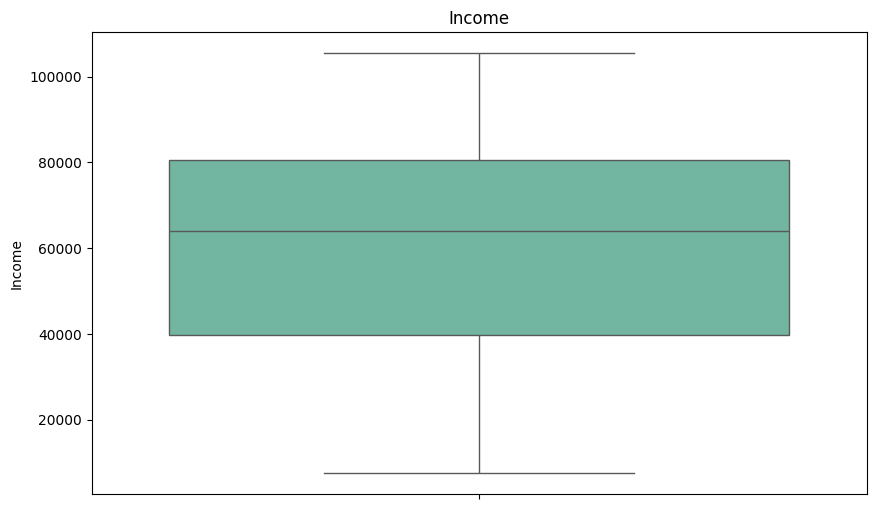

In [287]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=spresY, y='Income', palette="Set2")
plt.title('Income')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13148\1023682580.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spresN, y='Income', palette="Set2")


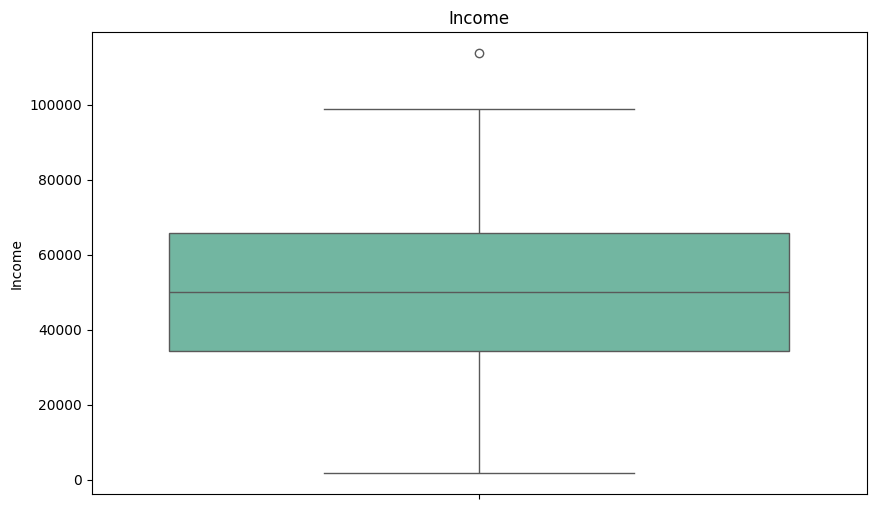

In [288]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=spresN, y='Income', palette="Set2")
plt.title('Income')
plt.show()

In [289]:
sp[sp['HMLRecency']=='aL']['Income'].mean()

51922.0

In [290]:
sp[sp['HMLRecency']=='bM']['Income'].mean()

50964.80930232558

In [291]:
sp[sp['HMLRecency']=='cH']['Income'].mean()

51860.511204481794

In [292]:
sp[sp['HMLMntTotal']=='cL']['Income'].mean()

35605.500454132605

In [293]:
sp[sp['HMLMntTotal']=='bM']['Income'].mean()

58641.69683257918

In [294]:
sp[sp['HMLMntTotal']=='aH']['Income'].mean()

73573.16163141993

In [295]:
sp[['Age','N_Edu','Income','Home_Member','Adulthome','Sonhome','Recency','MntTotal']].describe()

,Age,N_Edu,Income,Home_Member,Adulthome,Sonhome,Recency,MntTotal
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,46.095692,3.043084,51622.094785,2.593651,1.644898,0.948753,49.009070,606.821769
std,11.705801,1.276783,20713.063826,0.906197,0.478653,0.749231,28.932111,601.675284
min,19.000000,1.000000,1730.000000,1.000000,1.000000,0.000000,0.000000,5.000000
25%,38.000000,2.000000,35196.000000,2.000000,1.000000,0.000000,24.000000,69.000000
50%,45.000000,2.000000,51287.000000,3.000000,2.000000,1.000000,49.000000,397.000000
75%,56.000000,4.000000,68281.000000,3.000000,2.000000,1.000000,74.000000,1047.000000
max,75.000000,5.000000,113734.000000,5.000000,2.000000,3.000000,99.000000,2525.000000


In [296]:
sp[(sp['HMLRecency']=='cH') & (sp['HMLMntTotal']=='aH')][['Age','N_Edu','Income','Home_Member','Adulthome','Sonhome','Recency','MntTotal']].describe()

,Age,N_Edu,Income,Home_Member,Adulthome,Sonhome,Recency,MntTotal
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,47.147783,3.133005,74065.256158,2.014778,1.650246,0.364532,15.113300,1408.674877
std,13.102333,1.284733,9994.104744,0.727656,0.478071,0.540556,9.641698,354.126247
min,20.000000,2.000000,51537.000000,1.000000,1.000000,0.000000,0.000000,928.000000
25%,37.000000,2.000000,67424.500000,2.000000,1.000000,0.000000,6.000000,1125.500000
50%,47.000000,2.000000,74165.000000,2.000000,2.000000,0.000000,15.000000,1338.000000
75%,57.000000,4.000000,80676.000000,2.000000,2.000000,1.000000,24.500000,1663.500000
max,71.000000,5.000000,102692.000000,5.000000,2.000000,3.000000,30.000000,2525.000000


In [297]:
sp[(sp['HMLRecency']=='bM') & (sp['HMLMntTotal']=='aH')][['Age','N_Edu','Income','Home_Member','Adulthome','Sonhome','Recency','MntTotal']].describe()

,Age,N_Edu,Income,Home_Member,Adulthome,Sonhome,Recency,MntTotal
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,48.215385,3.102564,73136.856410,2.061538,1.630769,0.430769,46.748718,1390.661538
std,12.983922,1.268063,11546.996995,0.764083,0.483839,0.582456,8.649738,345.889244
min,20.000000,2.000000,2447.000000,1.000000,1.000000,0.000000,31.000000,928.000000
25%,39.000000,2.000000,65487.500000,2.000000,1.000000,0.000000,40.000000,1101.500000
50%,48.000000,2.000000,73059.000000,2.000000,2.000000,0.000000,47.000000,1336.000000
75%,59.000000,4.000000,80651.000000,3.000000,2.000000,1.000000,54.500000,1598.000000
max,72.000000,5.000000,105471.000000,4.000000,2.000000,2.000000,60.000000,2486.000000


In [298]:
sp[(sp['HMLRecency']=='cH') & (sp['HMLMntTotal']=='bM')][['Age','N_Edu','Income','Home_Member','Adulthome','Sonhome','Recency','MntTotal']].describe()

,Age,N_Edu,Income,Home_Member,Adulthome,Sonhome,Recency,MntTotal
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,47.865772,3.174497,60090.429530,2.590604,1.630872,0.959732,15.342282,647.644295
std,10.731778,1.255967,12098.851703,0.805500,0.484196,0.624707,9.440977,162.143625
min,24.000000,2.000000,33051.000000,1.000000,1.000000,0.000000,0.000000,398.000000
25%,40.000000,2.000000,51039.000000,2.000000,1.000000,1.000000,8.000000,491.000000
50%,47.000000,3.000000,60208.000000,3.000000,2.000000,1.000000,15.000000,656.000000
75%,57.000000,4.000000,66653.000000,3.000000,2.000000,1.000000,24.000000,795.000000
max,71.000000,5.000000,96547.000000,4.000000,2.000000,3.000000,30.000000,926.000000


In [299]:
sp[(sp['HMLRecency']=='aL') & (sp['HMLMntTotal']=='aH')][['Age','N_Edu','Income','Home_Member','Adulthome','Sonhome','Recency','MntTotal']].describe()

,Age,N_Edu,Income,Home_Member,Adulthome,Sonhome,Recency,MntTotal
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,47.738636,3.117424,73517.041667,2.056818,1.606061,0.450758,78.950758,1413.238636
std,12.017884,1.312936,10492.283259,0.854751,0.489550,0.638915,11.394809,364.284924
min,22.000000,2.000000,44802.000000,1.000000,1.000000,0.000000,61.000000,928.000000
25%,40.000000,2.000000,66577.750000,1.000000,1.000000,0.000000,69.750000,1119.250000
50%,47.500000,2.000000,73496.500000,2.000000,2.000000,0.000000,78.000000,1336.500000
75%,57.000000,5.000000,81180.250000,3.000000,2.000000,1.000000,89.000000,1641.000000
max,74.000000,5.000000,101970.000000,5.000000,2.000000,3.000000,99.000000,2524.000000


In [300]:
spresN[['Age','N_Edu','Income','Home_Member','Adulthome','Sonhome','Recency','MntTotal']].describe()

,Age,N_Edu,Income,Home_Member,Adulthome,Sonhome,Recency,MntTotal
count,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000
mean,46.200855,2.996261,50094.496261,2.677350,1.675214,1.002137,51.454060,539.432158
std,11.591213,1.261394,19861.274944,0.874583,0.468420,0.738348,28.480192,551.837015
min,19.000000,1.000000,1730.000000,1.000000,1.000000,0.000000,0.000000,5.000000
25%,38.000000,2.000000,34379.250000,2.000000,1.000000,1.000000,27.000000,62.000000
50%,45.000000,2.000000,50008.000000,3.000000,2.000000,1.000000,52.000000,315.000000
75%,56.000000,4.000000,65876.500000,3.000000,2.000000,1.000000,76.000000,957.000000
max,75.000000,5.000000,113734.000000,5.000000,2.000000,3.000000,99.000000,2525.000000


In [301]:
spresY[['Age','N_Edu','Income','Home_Member','Adulthome','Sonhome','Recency','MntTotal']].describe()

,Age,N_Edu,Income,Home_Member,Adulthome,Sonhome,Recency,MntTotal
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,45.504505,3.306306,60209.675676,2.123123,1.474474,0.648649,35.264264,985.660661
std,12.331667,1.331677,23194.080987,0.937749,0.500099,0.740180,27.615407,719.393948
min,19.000000,1.000000,7500.000000,1.000000,1.000000,0.000000,0.000000,17.000000
25%,36.000000,2.000000,39763.000000,1.000000,1.000000,0.000000,11.000000,252.000000
50%,44.000000,3.000000,64090.000000,2.000000,1.000000,0.000000,30.000000,1053.000000
75%,56.000000,5.000000,80589.000000,3.000000,2.000000,1.000000,56.000000,1617.000000
max,72.000000,5.000000,105471.000000,5.000000,2.000000,3.000000,99.000000,2525.000000


In [302]:
a = sp[(sp['HMLRecency']=='cH') & (sp['HMLMntTotal']=='aH')][['MntFishProducts','MntMeatProducts','MntFruits','MntSweetProducts','MntWines','MntGoldProds','MntTotal']].mean()
print(f'HH_Mnt 비율\n수산물 : {round(a[0]/a[6]*100,2)} %\n육류 : {round(a[1]/a[6]*100,2)} %\n과일 : {round(a[2]/a[6]*100,2)} %\n과자 : {round(a[3]/a[6]*100,2)} %\n와인 : {round(a[4]/a[6]*100,2)} %\n사치 : {round(a[5]/a[6]*100,2)} %')

HH_Mnt 비율
수산물 : 6.05 %
육류 : 29.23 %
과일 : 4.38 %
과자 : 4.32 %
와인 : 50.59 %
사치 : 5.42 %


C:\Users\user\AppData\Local\Temp\ipykernel_13148\226422069.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'HH_Mnt 비율\n수산물 : {round(a[0]/a[6]*100,2)} %\n육류 : {round(a[1]/a[6]*100,2)} %\n과일 : {round(a[2]/a[6]*100,2)} %\n과자 : {round(a[3]/a[6]*100,2)} %\n와인 : {round(a[4]/a[6]*100,2)} %\n사치 : {round(a[5]/a[6]*100,2)} %')


In [303]:
a = sp[(sp['HMLRecency']=='bM') & (sp['HMLMntTotal']=='aH')][['MntFishProducts','MntMeatProducts','MntFruits','MntSweetProducts','MntWines','MntGoldProds','MntTotal']].mean()
print(f'MH_Mnt 비율\n수산물 : {round(a[0]/a[6]*100,2)} %\n육류 : {round(a[1]/a[6]*100,2)} %\n과일 : {round(a[2]/a[6]*100,2)} %\n과자 : {round(a[3]/a[6]*100,2)} %\n와인 : {round(a[4]/a[6]*100,2)} %\n사치 : {round(a[5]/a[6]*100,2)} %')

MH_Mnt 비율
수산물 : 6.39 %
육류 : 28.63 %
과일 : 4.5 %
과자 : 4.29 %
와인 : 50.11 %
사치 : 6.08 %


C:\Users\user\AppData\Local\Temp\ipykernel_13148\3548481624.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'MH_Mnt 비율\n수산물 : {round(a[0]/a[6]*100,2)} %\n육류 : {round(a[1]/a[6]*100,2)} %\n과일 : {round(a[2]/a[6]*100,2)} %\n과자 : {round(a[3]/a[6]*100,2)} %\n와인 : {round(a[4]/a[6]*100,2)} %\n사치 : {round(a[5]/a[6]*100,2)} %')


In [304]:
a = sp[(sp['HMLRecency']=='cH') & (sp['HMLMntTotal']=='bM')][['MntFishProducts','MntMeatProducts','MntFruits','MntSweetProducts','MntWines','MntGoldProds','MntTotal']].mean()
print(f'HM_Mnt 비율\n수산물 : {round(a[0]/a[6]*100,2)} %\n육류 : {round(a[1]/a[6]*100,2)} %\n과일 : {round(a[2]/a[6]*100,2)} %\n과자 : {round(a[3]/a[6]*100,2)} %\n와인 : {round(a[4]/a[6]*100,2)} %\n사치 : {round(a[5]/a[6]*100,2)} %')

HM_Mnt 비율
수산물 : 6.83 %
육류 : 23.15 %
과일 : 4.73 %
과자 : 4.35 %
와인 : 51.87 %
사치 : 9.08 %


C:\Users\user\AppData\Local\Temp\ipykernel_13148\3916602341.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'HM_Mnt 비율\n수산물 : {round(a[0]/a[6]*100,2)} %\n육류 : {round(a[1]/a[6]*100,2)} %\n과일 : {round(a[2]/a[6]*100,2)} %\n과자 : {round(a[3]/a[6]*100,2)} %\n와인 : {round(a[4]/a[6]*100,2)} %\n사치 : {round(a[5]/a[6]*100,2)} %')


In [305]:
a = sp[['MntFishProducts','MntMeatProducts','MntFruits','MntSweetProducts','MntWines','MntGoldProds','MntTotal']].mean()
print(f'전체 Mnt 비율\n수산물 : {round(a[0]/a[6]*100,2)} %\n육류 : {round(a[1]/a[6]*100,2)} %\n과일 : {round(a[2]/a[6]*100,2)} %\n과자 : {round(a[3]/a[6]*100,2)} %\n와인 : {round(a[4]/a[6]*100,2)} %\n사치 : {round(a[5]/a[6]*100,2)} %')

전체 Mnt 비율
수산물 : 6.22 %
육류 : 27.24 %
과일 : 4.35 %
과자 : 4.47 %
와인 : 50.45 %
사치 : 7.26 %


C:\Users\user\AppData\Local\Temp\ipykernel_13148\3112788696.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'전체 Mnt 비율\n수산물 : {round(a[0]/a[6]*100,2)} %\n육류 : {round(a[1]/a[6]*100,2)} %\n과일 : {round(a[2]/a[6]*100,2)} %\n과자 : {round(a[3]/a[6]*100,2)} %\n와인 : {round(a[4]/a[6]*100,2)} %\n사치 : {round(a[5]/a[6]*100,2)} %')


In [306]:
a = sp[((sp['HMLRecency']=='cH') | (sp['HMLRecency']=='bM')) & ((sp['HMLMntTotal']=='aH') | (sp['HMLMntTotal']=='bM'))]
a

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,OffLine_Purchase,Online_Purchase,N_Edu,N_Dt,Purchases,N_Recency,Cus_Trans,HMLRecency,HMLMntTotal,HML
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,10,4,2,2014-6-16,14,a1_week,85.00,cH,aH,cHaH
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,10,7,2,2014-6-15,17,a1_week,33.94,cH,bM,cHbM
5,7348,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,...,12,4,5,2014-3-17,16,a1_week,74.50,cH,aH,cHaH
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,...,17,10,3,2014-1-29,27,a1_week,45.00,cH,aH,cHaH
8,4047,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,...,11,6,5,2014-11-1,17,a1_week,32.00,cH,bM,cHbM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,8537,1949,Graduation,Widow,72643.0,0,0,2/27/2013,60,526,...,17,3,2,2013-2-27,20,f2_months_over,71.45,bM,aH,bMaH
1372,5935,1956,Master,Single,55284.0,0,1,12/24/2012,60,547,...,13,7,4,2012-12-24,20,f2_months_over,38.20,bM,bM,bMbM
1375,3202,1987,PhD,Married,51563.0,0,0,1/10/2012,60,1166,...,14,4,5,2012-1-10,18,f2_months_over,69.44,bM,aH,bMaH
1376,1103,1976,Master,Married,81929.0,1,0,9/29/2012,60,1486,...,14,4,4,2012-9-29,18,f2_months_over,114.06,bM,aH,bMaH


In [307]:
a = sp[(sp['HML']=='cHaH') |(sp['HML']=='cHbM') | (sp['HML']=='bMaH')]

In [308]:
a = sp[(sp['HML']=='cHaH') |(sp['HML']=='cHbM') | (sp['HML']=='bMaH')]
b = a[['MntFishProducts','MntMeatProducts','MntFruits','MntSweetProducts','MntWines','MntGoldProds','MntTotal']].mean()
print(f'타겟그룹 Mnt 비율\n수산물 : {round(b[0]/b[6]*100,2)} %\n육류 : {round(b[1]/b[6]*100,2)} %\n과일 : {round(b[2]/b[6]*100,2)} %\n과자 : {round(b[3]/b[6]*100,2)} %\n와인 : {round(b[4]/b[6]*100,2)} %\n사치 : {round(b[5]/b[6]*100,2)} %')

타겟그룹 Mnt 비율
수산물 : 6.3 %
육류 : 28.08 %
과일 : 4.48 %
과자 : 4.31 %
와인 : 50.58 %
사치 : 6.24 %


C:\Users\user\AppData\Local\Temp\ipykernel_13148\4043051367.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'타겟그룹 Mnt 비율\n수산물 : {round(b[0]/b[6]*100,2)} %\n육류 : {round(b[1]/b[6]*100,2)} %\n과일 : {round(b[2]/b[6]*100,2)} %\n과자 : {round(b[3]/b[6]*100,2)} %\n와인 : {round(b[4]/b[6]*100,2)} %\n사치 : {round(b[5]/b[6]*100,2)} %')


In [309]:
b = sp['Education'].value_counts()
print(f'전체 교육 수준\n중졸 : {round(b[4]/b.sum()*100,2)} %\n고졸 : {round(b[0]/b.sum()*100,2)} %\n대졸 : {round(b[4]/b.sum()*100,2)} %\n석사 : {round(b[2]/b.sum()*100,2)} %\n박사 : {round(b[1]/b.sum()*100,2)} %')

전체 교육 수준
중졸 : 2.45 %
고졸 : 50.48 %
대졸 : 2.45 %
석사 : 16.51 %
박사 : 21.59 %


C:\Users\user\AppData\Local\Temp\ipykernel_13148\1662157615.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'전체 교육 수준\n중졸 : {round(b[4]/b.sum()*100,2)} %\n고졸 : {round(b[0]/b.sum()*100,2)} %\n대졸 : {round(b[4]/b.sum()*100,2)} %\n석사 : {round(b[2]/b.sum()*100,2)} %\n박사 : {round(b[1]/b.sum()*100,2)} %')


In [310]:
b = a['Education'].value_counts()
b

print(f'타겟그룹 교육 수준\n중졸 : 0 %\n고졸 : {round(b[0]/b.sum()*100,2)} %\n대졸 : {round(b[3]/b.sum()*100,2)} %\n석사 : {round(b[2]/b.sum()*100,2)} %\n박사 : {round(b[1]/b.sum()*100,2)} %')

타겟그룹 교육 수준
중졸 : 0 %
고졸 : 50.64 %
대졸 : 9.32 %
석사 : 16.09 %
박사 : 23.95 %


C:\Users\user\AppData\Local\Temp\ipykernel_13148\3770803116.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'타겟그룹 교육 수준\n중졸 : 0 %\n고졸 : {round(b[0]/b.sum()*100,2)} %\n대졸 : {round(b[3]/b.sum()*100,2)} %\n석사 : {round(b[2]/b.sum()*100,2)} %\n박사 : {round(b[1]/b.sum()*100,2)} %')


In [311]:
b = a[a['HML']=='cHaH']['Education'].value_counts()
print(f'HH 교육 수준\n중졸 : 0 %\n고졸 : {round(b[0]/b.sum()*100,2)} %\n대졸 : {round(b[3]/b.sum()*100,2)} %\n석사 : {round(b[2]/b.sum()*100,2)} %\n박사 : {round(b[1]/b.sum()*100,2)} %')

HH 교육 수준
중졸 : 0 %
고졸 : 52.22 %
대졸 : 6.4 %
석사 : 17.24 %
박사 : 24.14 %


C:\Users\user\AppData\Local\Temp\ipykernel_13148\3869965377.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'HH 교육 수준\n중졸 : 0 %\n고졸 : {round(b[0]/b.sum()*100,2)} %\n대졸 : {round(b[3]/b.sum()*100,2)} %\n석사 : {round(b[2]/b.sum()*100,2)} %\n박사 : {round(b[1]/b.sum()*100,2)} %')


In [312]:
b = a[a['HML']=='cHbM']['Education'].value_counts()
print(f'HM 교육 수준\n중졸 : 0 %\n고졸 : {round(b[0]/b.sum()*100,2)} %\n대졸 : {round(b[3]/b.sum()*100,2)} %\n석사 : {round(b[2]/b.sum()*100,2)} %\n박사 : {round(b[1]/b.sum()*100,2)} %')

HM 교육 수준
중졸 : 0 %
고졸 : 47.65 %
대졸 : 10.74 %
석사 : 18.12 %
박사 : 23.49 %


C:\Users\user\AppData\Local\Temp\ipykernel_13148\3758199731.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'HM 교육 수준\n중졸 : 0 %\n고졸 : {round(b[0]/b.sum()*100,2)} %\n대졸 : {round(b[3]/b.sum()*100,2)} %\n석사 : {round(b[2]/b.sum()*100,2)} %\n박사 : {round(b[1]/b.sum()*100,2)} %')


In [313]:
b = a[a['HML']=='bMaH']['Education'].value_counts()
print(f'MH 교육 수준\n중졸 : 0 %\n고졸 : {round(b[0]/b.sum()*100,2)} %\n대졸 : {round(b[3]/b.sum()*100,2)} %\n석사 : {round(b[2]/b.sum()*100,2)} %\n박사 : {round(b[1]/b.sum()*100,2)} %')

MH 교육 수준
중졸 : 0 %
고졸 : 51.28 %
대졸 : 11.28 %
석사 : 13.33 %
박사 : 24.1 %


C:\Users\user\AppData\Local\Temp\ipykernel_13148\2948228842.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'MH 교육 수준\n중졸 : 0 %\n고졸 : {round(b[0]/b.sum()*100,2)} %\n대졸 : {round(b[3]/b.sum()*100,2)} %\n석사 : {round(b[2]/b.sum()*100,2)} %\n박사 : {round(b[1]/b.sum()*100,2)} %')


In [314]:
b

Education
Graduation    100
PhD            47
Master         26
2n Cycle       22
Name: count, dtype: int64

In [315]:
aa = sp[(sp['HML']=='cHcL') | (sp['HML']=='aLaH') | (sp['HML']=='bMbM') | (sp['HML']=='bMcL') | (sp['HML']=='aLbM') | (sp['HML']=='aLcL') ]

In [316]:
aa

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,OffLine_Purchase,Online_Purchase,N_Edu,N_Dt,Purchases,N_Recency,Cus_Trans,HMLRecency,HMLMntTotal,HML
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,7,3,2,2014-5-13,10,a1_week,25.10,cH,cL,cHcL
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,2,1,2,2014-11-5,3,a1_week,3.67,cH,cL,cHcL
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,3,3,2,2014-8-4,6,a1_week,15.17,cH,cL,cHcL
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/2014,0,78,...,4,2,2,2014-1-18,6,a1_week,16.00,cH,cL,cHcL
11,5642,1979,Master,Together,62499.0,1,0,9/12/2013,0,140,...,7,3,4,2013-9-12,10,a1_week,22.20,cH,cL,cHcL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,13,5,5,2013-7-3,18,f2_months_over,38.28,aL,bM,aLbM
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,1,3,2013-1-22,4,f2_months_over,13.75,aL,cL,aLcL
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,6,6,2,2012-3-12,12,f2_months_over,25.75,aL,cL,aLcL
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,14,5,2,2012-11-29,19,f2_months_over,72.79,aL,aH,aLaH


In [317]:
aa = sp[(sp['HML']=='cHcL') | (sp['HML']=='aLaH') | (sp['HML']=='bMbM') | (sp['HML']=='bMcL') | (sp['HML']=='aLbM') | (sp['HML']=='aLcL') ]
b = aa['Education'].value_counts()
print(f'비타겟그룹 교육 수준\n중졸 : {round(b[4]/b.sum()*100,2)} %\n고졸 : {round(b[0]/b.sum()*100,2)} %\n대졸 : {round(b[3]/b.sum()*100,2)} %\n석사 : {round(b[2]/b.sum()*100,2)} %\n박사 : {round(b[1]/b.sum()*100,2)} %')

비타겟그룹 교육 수준
중졸 : 3.26 %
고졸 : 50.42 %
대졸 : 8.87 %
석사 : 16.65 %
박사 : 20.81 %


C:\Users\user\AppData\Local\Temp\ipykernel_13148\2551507303.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'비타겟그룹 교육 수준\n중졸 : {round(b[4]/b.sum()*100,2)} %\n고졸 : {round(b[0]/b.sum()*100,2)} %\n대졸 : {round(b[3]/b.sum()*100,2)} %\n석사 : {round(b[2]/b.sum()*100,2)} %\n박사 : {round(b[1]/b.sum()*100,2)} %')


In [318]:
b = aa['Education'].value_counts()
b

Education
Graduation    836
PhD           345
Master        276
2n Cycle      147
Basic          54
Name: count, dtype: int64

In [319]:
b = aa[['MntFishProducts','MntMeatProducts','MntFruits','MntSweetProducts','MntWines','MntGoldProds','MntTotal']].mean()
print(f'비타겟그룹 Mnt 비율\n수산물 : {round(b[0]/b[6]*100,2)} %\n육류 : {round(b[1]/b[6]*100,2)} %\n과일 : {round(b[2]/b[6]*100,2)} %\n과자 : {round(b[3]/b[6]*100,2)} %\n와인 : {round(b[4]/b[6]*100,2)} %\n사치 : {round(b[5]/b[6]*100,2)} %')

비타겟그룹 Mnt 비율
수산물 : 6.14 %
육류 : 26.44 %
과일 : 4.23 %
과자 : 4.62 %
와인 : 50.33 %
사치 : 8.24 %


C:\Users\user\AppData\Local\Temp\ipykernel_13148\3516485519.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'비타겟그룹 Mnt 비율\n수산물 : {round(b[0]/b[6]*100,2)} %\n육류 : {round(b[1]/b[6]*100,2)} %\n과일 : {round(b[2]/b[6]*100,2)} %\n과자 : {round(b[3]/b[6]*100,2)} %\n와인 : {round(b[4]/b[6]*100,2)} %\n사치 : {round(b[5]/b[6]*100,2)} %')


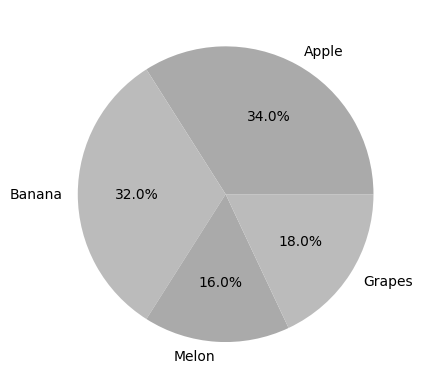

In [507]:
import matplotlib.pyplot as plt

ratio = [34, 32, 16, 18]
labels = ['Apple', 'Banana', 'Melon', 'Grapes']
colors=colors
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()


In [523]:
sns.set_palette(sns.color_palette(palette))

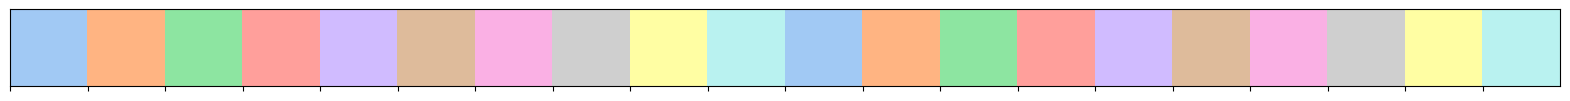

In [521]:
palette = sns.color_palette('pastel', 20)
sns.palplot(palette)

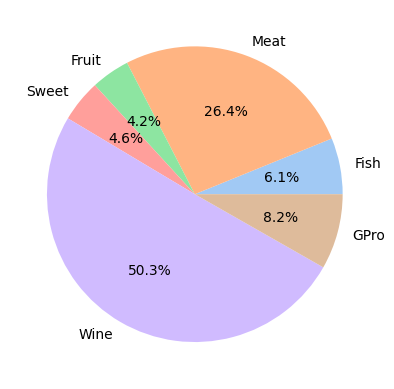

In [524]:
c = nontarget[['MntFishProducts','MntMeatProducts','MntFruits','MntSweetProducts','MntWines','MntGoldProds']].mean()
labels = ['Fish','Meat','Fruit','Sweet','Wine','GPro']
plt.pie(c,labels=labels,autopct='%.1f%%')
plt.show()

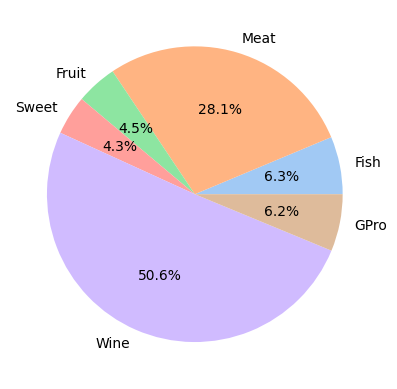

In [526]:
c = target[['MntFishProducts','MntMeatProducts','MntFruits','MntSweetProducts','MntWines','MntGoldProds']].mean()
labels = ['Fish','Meat','Fruit','Sweet','Wine','GPro']
plt.pie(c,labels=labels,autopct='%.1f%%')
plt.show()

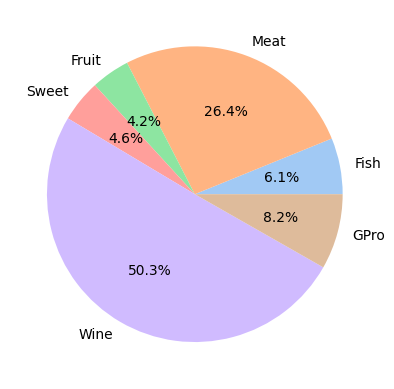

In [527]:
c = nontarget[['MntFishProducts','MntMeatProducts','MntFruits','MntSweetProducts','MntWines','MntGoldProds']].sum()
labels = ['Fish','Meat','Fruit','Sweet','Wine','GPro']
plt.pie(c,labels=labels,autopct='%.1f%%')
plt.show()

In [324]:
focus = sp[(sp['HML']=='cHaH') |(sp['HML']=='cHbM') | (sp['HML']=='bMaH')]
unfocus = sp[(sp['HML']=='cHcL') | (sp['HML']=='aLaH') | (sp['HML']=='bMbM') | (sp['HML']=='bMcL') | (sp['HML']=='aLbM') | (sp['HML']=='aLcL') ]
unfocus

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,OffLine_Purchase,Online_Purchase,N_Edu,N_Dt,Purchases,N_Recency,Cus_Trans,HMLRecency,HMLMntTotal,HML
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,7,3,2,2014-5-13,10,a1_week,25.10,cH,cL,cHcL
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,2,1,2,2014-11-5,3,a1_week,3.67,cH,cL,cHcL
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,3,3,2,2014-8-4,6,a1_week,15.17,cH,cL,cHcL
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/2014,0,78,...,4,2,2,2014-1-18,6,a1_week,16.00,cH,cL,cHcL
11,5642,1979,Master,Together,62499.0,1,0,9/12/2013,0,140,...,7,3,4,2013-9-12,10,a1_week,22.20,cH,cL,cHcL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,13,5,5,2013-7-3,18,f2_months_over,38.28,aL,bM,aLbM
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,1,3,2013-1-22,4,f2_months_over,13.75,aL,cL,aLcL
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,6,6,2,2012-3-12,12,f2_months_over,25.75,aL,cL,aLcL
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,14,5,2,2012-11-29,19,f2_months_over,72.79,aL,aH,aLaH


In [325]:
e = round(sp['MntTotal'].sum()/focus['Purchases'].sum(),2)
e

126.47

In [326]:
f = round(sp['MntTotal'].sum()/unfocus['Purchases'].sum(),2)
f

78.08

In [327]:
sp[:6]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,OffLine_Purchase,Online_Purchase,N_Edu,N_Dt,Purchases,N_Recency,Cus_Trans,HMLRecency,HMLMntTotal,HML
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,10,4,2,2014-6-16,14,a1_week,85.00,cH,aH,cHaH
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,10,7,2,2014-6-15,17,a1_week,33.94,cH,bM,cHbM
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,7,3,2,2014-5-13,10,a1_week,25.10,cH,cL,cHcL
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,2,1,2,2014-11-5,3,a1_week,3.67,cH,cL,cHcL
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,3,3,2,2014-8-4,6,a1_week,15.17,cH,cL,cHcL
5,7348,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,...,12,4,5,2014-3-17,16,a1_week,74.50,cH,aH,cHaH


In [535]:
a = []
for i in sp['Recency']:
    if i <= 30:
        a.append('cH')
    elif i <= 60:
        a.append('bM')
    else :
        a.append('aL')
sp['HMLRecency'] = a

a = []
for i in sp['MntTotal']:
    if i >= 928:
        a.append('aH')
    elif i >= 397:
        a.append('bM')
    else :
        a.append('cL')
sp['HMLMntTotal'] = a

In [329]:
sp['Recency'].sort_values(ascending=False).head(int(sp['Id'].count()*0.5))

2239    99
2230    99
2223    99
2224    99
2225    99
        ..
1143    50
1122    50
1121    49
1119    49
1120    49
Name: Recency, Length: 1102, dtype: int64

In [330]:
sp['MntTotal'].sort_values(ascending=False).head(int(sp['Id'].count()*0.5))

672     2525
671     2525
1404    2524
1026    2486
1864    2440
        ... 
1129     401
1378     401
64       400
320      398
2113     397
Name: MntTotal, Length: 1102, dtype: int64

In [331]:
a = np.percentile(sp['Recency'],q=[25,50,75])
a

array([24., 49., 74.])

In [332]:
a = []
for i in sp['Recency']:
    if i <= 24:
        a.append(4)
    elif i <= 49:
        a.append(3)
    elif i <= 74:
        a.append(2)
    else :
        a.append(1)
sp['RecencyScore'] = a

In [333]:
sp

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Online_Purchase,N_Edu,N_Dt,Purchases,N_Recency,Cus_Trans,HMLRecency,HMLMntTotal,HML,RecencyScore
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,4,2,2014-6-16,14,a1_week,85.00,1,aH,cHaH,4
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,2,2014-6-15,17,a1_week,33.94,1,bM,cHbM,4
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,3,2,2014-5-13,10,a1_week,25.10,1,cL,cHcL,4
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,1,2,2014-11-5,3,a1_week,3.67,1,cL,cHcL,4
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,3,2,2014-8-4,6,a1_week,15.17,1,cL,cHcL,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,5,5,2013-7-3,18,f2_months_over,38.28,aL,bM,aLbM,1
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,1,3,2013-1-22,4,f2_months_over,13.75,aL,cL,aLcL,1
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,6,2,2012-3-12,12,f2_months_over,25.75,aL,cL,aLcL,1
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,5,2,2012-11-29,19,f2_months_over,72.79,aL,aH,aLaH,1


In [334]:
a = []
for i in sp['MntTotal']:
    if i >= 1048:
        a.append(4)
    elif i >= 396.5:
        a.append(3)
    elif i >= 69:
        a.append(2)
    else :
        a.append(1)
sp['MntTotalScore'] = a

In [335]:
a = np.percentile(sp['MntTotal'],q=[25,50,75])
a

array([  69.,  397., 1047.])

In [336]:
sp['Score'] = (sp['RecencyScore']+sp['MntTotalScore'])/2

In [337]:
pdf1 = pd.pivot_table(sp,                # 피벗할 데이터프레임
                     index = 'RecencyScore',    # 행 위치에 들어갈 열
                     columns = 'MntTotalScore',    # 열 위치에 들어갈 열
                     values = 'Score',     # 데이터로 사용할 열
                     aggfunc = 'count')   # 데이터 집계함수
pdf1

MntTotalScore,1,2,3,4
RecencyScore,,,,
1,144,137,118,138
2,116,138,163,145
3,152,127,131,138
4,135,152,141,130


In [338]:
sp['Purchases']=sp['NumWebPurchases']+sp['NumCatalogPurchases']+sp['NumStorePurchases']

In [339]:
a = []
for i in sp['Purchases']:
    if i >= 18:
        a.append(4)
    elif i >= 12:
        a.append(3)
    elif i >= 6:
        a.append(2)
    else :
        a.append(1)
sp['PurchasesScore'] = a
sp

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Purchases,N_Recency,Cus_Trans,HMLRecency,HMLMntTotal,HML,RecencyScore,MntTotalScore,Score,PurchasesScore
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,14,a1_week,85.00,1,aH,cHaH,4,4,4.0,3
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,17,a1_week,33.94,1,bM,cHbM,4,3,3.5,3
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,10,a1_week,25.10,1,cL,cHcL,4,2,3.0,2
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,3,a1_week,3.67,1,cL,cHcL,4,1,2.5,1
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,6,a1_week,15.17,1,cL,cHcL,4,2,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,18,f2_months_over,38.28,aL,bM,aLbM,1,3,2.0,4
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,4,f2_months_over,13.75,aL,cL,aLcL,1,1,1.0,1
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,12,f2_months_over,25.75,aL,cL,aLcL,1,2,1.5,3
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,19,f2_months_over,72.79,aL,aH,aLaH,1,4,2.5,4


In [340]:
a = np.percentile(sp['Purchases'],q=[25,50,75])
a

array([ 6., 12., 18.])

In [360]:
sp['Score'] = round((sp['RecencyScore']+sp['MntTotalScore']+sp['PurchasesScore'])/3,2)

In [361]:
sp['Score']

0       3.67
1       3.33
2       2.67
3       2.00
4       2.67
        ... 
2235    2.67
2236    1.00
2237    2.00
2238    3.00
2239    2.67
Name: Score, Length: 2205, dtype: float64

In [366]:
sp['RecencyScore'].mean()

2.511111111111111

In [367]:
sp['MntTotalScore'].mean()

2.5024943310657597

In [368]:
sp['PurchasesScore'].mean()

2.5877551020408163

<Axes: xlabel='ScoreSum', ylabel='Id'>

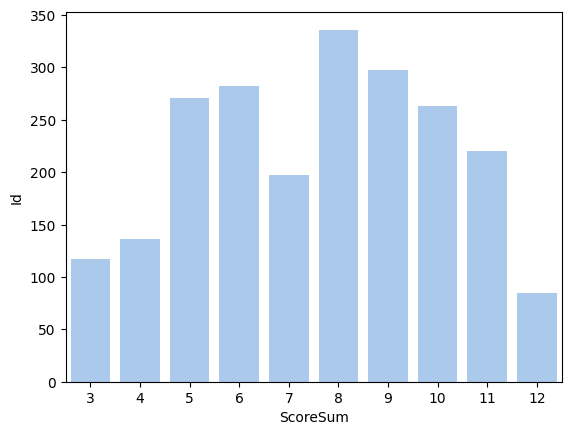

In [642]:
sp['ScoreSum'] = (sp['RecencyScore']+sp['MntTotalScore']+sp['PurchasesScore'])
a= sp.groupby('ScoreSum')['Id'].count()
sns.barplot(data=a)

In [346]:
a = []
for i,j in zip(sp['MntTotal'],sp['Purchases']):
    if j == 0:
        a.append(round(i/1,2))
    else :
        a.append(round(i/j,2))
sp['Cus_Trans'] = a

In [362]:
sp['Score'].value_counts().sort_index()

Score
1.00    117
1.33    136
1.67    271
2.00    282
2.33    197
2.67    336
3.00    298
3.33    263
3.67    220
4.00     85
Name: count, dtype: int64

<Axes: xlabel='Score', ylabel='Id'>

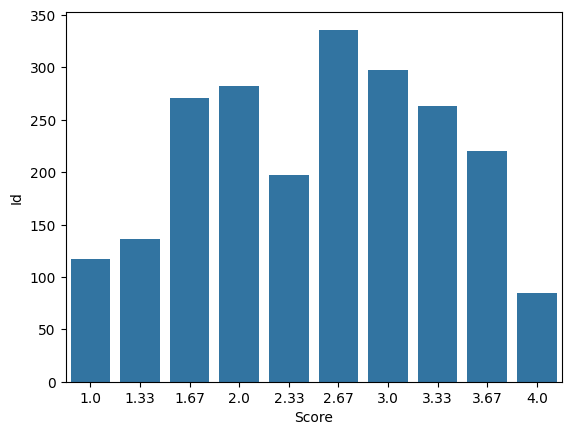

In [363]:
a= sp.groupby('Score')['Id'].count()
sns.barplot(data=a)

In [446]:
sp['ScoreSum'] = (sp['RecencyScore']+sp['MntTotalScore']+sp['PurchasesScore'])
a= sp.groupby('ScoreSum')['Id'].count()
a

ScoreSum
3     117
4     136
5     271
6     282
7     197
8     336
9     298
10    263
11    220
12     85
Name: Id, dtype: int64

In [389]:
a=sp[sp['ScoreSum']==12][['Age','N_Edu','Income','Home_Member','Adulthome','Sonhome','Recency','MntTotal']].mean()
aa=[]
for i in a:
    aa.append(round(i,2))
aa

[47.33, 3.27, 75678.49, 1.92, 1.65, 0.27, 11.89, 1501.06]

In [373]:
b=sp[sp['ScoreSum']==11][['Age','N_Edu','Income','Home_Member','Adulthome','Sonhome','Recency','MntTotal']].mean()

Age               47.609091
N_Edu              3.022727
Income         71120.327273
Home_Member        2.218182
Adulthome          1.668182
Sonhome            0.550000
Recency           22.772727
MntTotal        1249.977273
dtype: float64

In [374]:
sp[sp['ScoreSum']==10][['Age','N_Edu','Income','Home_Member','Adulthome','Sonhome','Recency','MntTotal']].mean()

Age               47.741445
N_Edu              3.186312
Income         68270.228137
Home_Member        2.228137
Adulthome          1.615970
Sonhome            0.612167
Recency           39.882129
MntTotal        1123.125475
dtype: float64

In [378]:
sp[sp['ScoreSum']==9][['Age','N_Edu','Income','Home_Member','Adulthome','Sonhome','Recency','MntTotal']].mean()

Age               47.936242
N_Edu              3.194631
Income         65011.228188
Home_Member        2.335570
Adulthome          1.597315
Sonhome            0.738255
Recency           60.583893
MntTotal        1055.171141
dtype: float64

In [422]:
lab='N_Edu','Home_Member','Adulthome','Sonhome'

In [423]:
a=sp[sp['ScoreSum']==12][['N_Edu','Home_Member','Adulthome','Sonhome']].mean()
aa=[]
for i in a:
    aa.append(round(i,2))
aa

[3.27, 1.92, 1.65, 0.27]

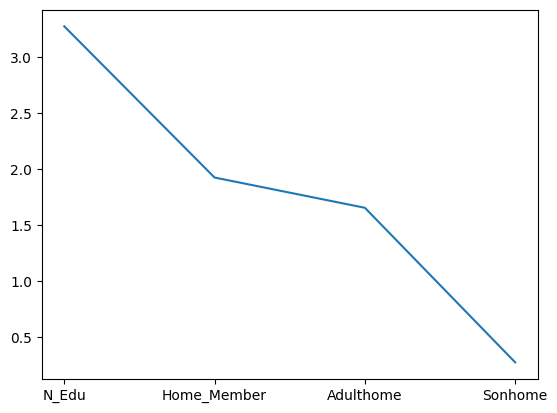

In [424]:
plt.plot(lab,aa)

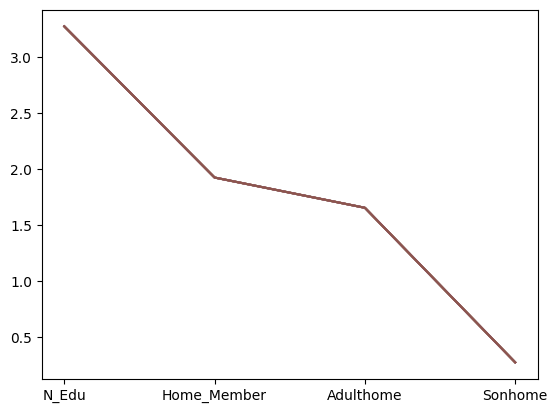

In [432]:
b=sp[sp['ScoreSum']==11][['N_Edu','Home_Member','Adulthome','Sonhome']].mean()
bb=[]
for i in a:
    bb.append(round(i,2))

In [449]:
target = sp[(sp['HML']=='cHaH') |(sp['HML']=='cHbM') | (sp['HML']=='bMaH')]
nontarget = sp[(sp['HML']=='cHcL') | (sp['HML']=='aLaH') | (sp['HML']=='bMbM') | (sp['HML']=='bMcL') | (sp['HML']=='aLbM') | (sp['HML']=='aLcL')]
len(target)

547

In [448]:
a=[]
for i in sp['HML']:
    if i=='cHaH' or i=='cHbM' or i=='bMaH':
        a.append('target')
    else:
        a.append('nontarget')
sp['Target'] = a
sp['Target'].value_counts()

Target
nontarget    1658
target        547
Name: count, dtype: int64

<Axes: xlabel='Target', ylabel='Id'>

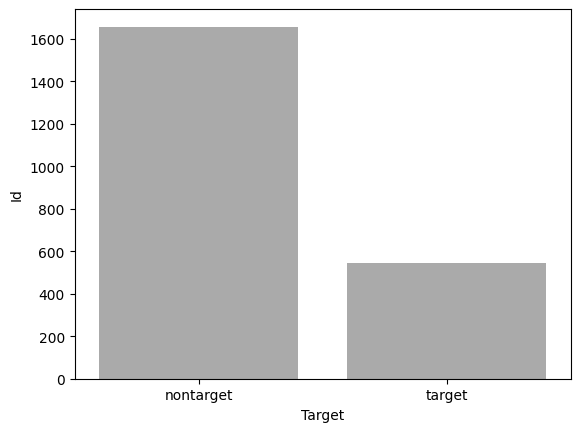

In [479]:
a= sp.groupby('Target')['Id'].count()
sns.barplot(data=a)

<Axes: xlabel='Target', ylabel='Age'>

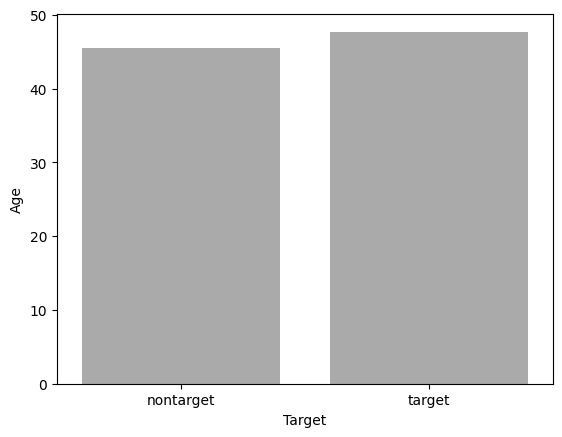

In [485]:
a= sp.groupby('Target')['Age'].mean()
sns.barplot(data=a)

C:\Users\user\AppData\Local\Temp\ipykernel_13148\726918285.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,palette="Blues")


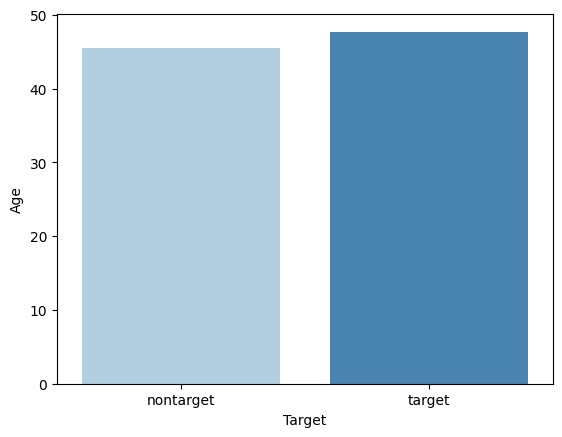

In [488]:
a= sp.groupby('Target')['Age'].mean()
sns.barplot(data=a,palette="Blues")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13148\936671252.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,palette="Blues")


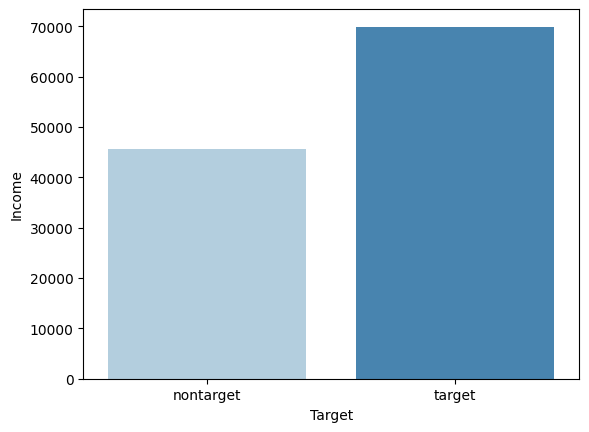

In [489]:
a= sp.groupby('Target')['Income'].mean()
sns.barplot(data=a,palette="Blues")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13148\3106604020.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,palette="Blues")


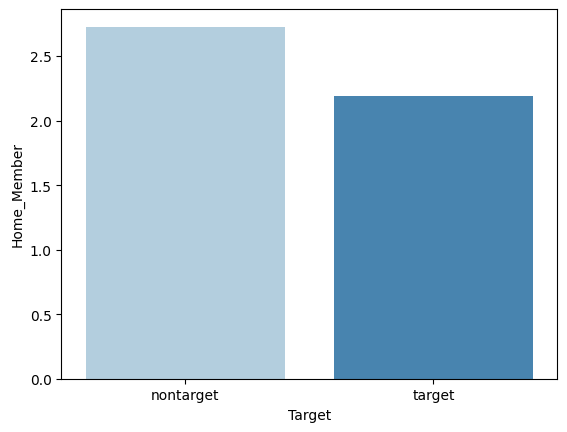

In [490]:
a= sp.groupby('Target')['Home_Member'].mean()
sns.barplot(data=a,palette="Blues")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13148\161418110.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,palette="Blues")


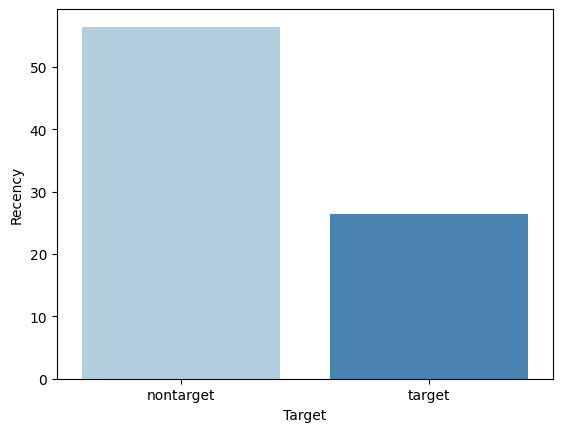

In [494]:
a= sp.groupby('Target')['Recency'].mean()
sns.barplot(data=a,palette="Blues")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13148\1603183419.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,palette="Blues")


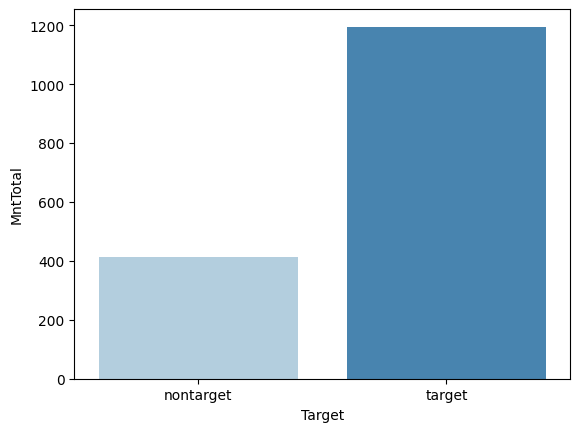

In [529]:
a= sp.groupby('Target')['MntTotal'].mean()
sns.barplot(data=a,palette="Blues")
plt.show()

In [551]:
aa=[]
bb=[]
a= sp.groupby('Target')['MntFishProducts'].mean()
aa.append(round(a[0],2))
bb.append(round(a[1],2))
b= sp.groupby('Target')['MntMeatProducts'].mean()
aa.append(round(b[0],2))
bb.append(round(b[1],2))
c= sp.groupby('Target')['MntFruits'].mean()
aa.append(round(c[0],2))
bb.append(round(c[1],2))
d= sp.groupby('Target')['MntSweetProducts'].mean()
aa.append(round(d[0],2))
bb.append(round(d[1],2))
e= sp.groupby('Target')['MntWines'].mean()
aa.append(round(e[0],2))
bb.append(round(e[1],2))
f= sp.groupby('Target')['MntGoldProds'].mean()
aa.append(round(f[0],2))
bb.append(round(f[1],2))
print(aa)
print(bb)

[25.36, 109.13, 17.44, 19.08, 207.77, 34.01]
[75.32, 335.59, 53.57, 51.54, 604.42, 74.52]


C:\Users\user\AppData\Local\Temp\ipykernel_13148\219074602.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aa.append(round(a[0],2))
C:\Users\user\AppData\Local\Temp\ipykernel_13148\219074602.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bb.append(round(a[1],2))
C:\Users\user\AppData\Local\Temp\ipykernel_13148\219074602.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aa.append(round(b[0],2))
C:\Users\user\AppData\Local\

[]

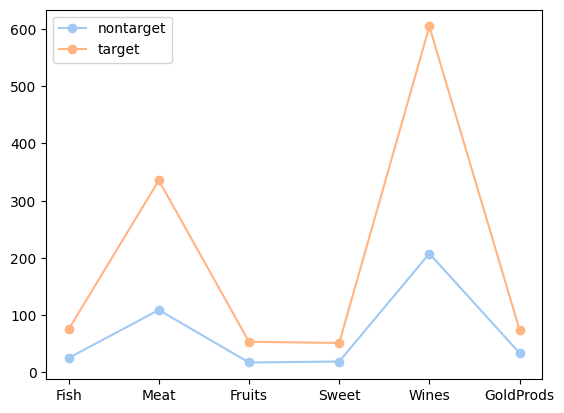

In [574]:
label='Fish','Meat','Fruits','Sweet','Wines','GoldProds'
plt.plot(label,aa,marker='o',label='nontarget')
plt.plot(label,bb,marker='o',label='target')
plt.legend()
plt.plot()

[]

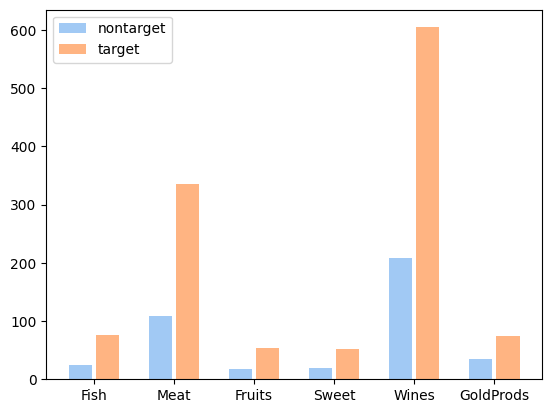

In [614]:
label='Fish','Meat','Fruits','Sweet','Wines','GoldProds'
idx = np.arange(len(label))
w=0.17
plt.bar(idx-w,aa,label='nontarget',width=w*1.7)
plt.bar(idx+w,bb,label='target',width=w*1.7)
plt.legend()
plt.xticks(idx,label)
plt.plot()

In [599]:
idx = np.arange(len(label))
idx

array([0, 1, 2, 3, 4, 5])

In [634]:
sp['MntTotal'].sum()*0.8

1070433.6

In [638]:
sp['MntTotal'].sort_values(ascending=False).head(int(sp['Id'].count()*0.38)).sum()

1073221

C:\Users\user\AppData\Local\Temp\ipykernel_13148\664678422.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sp['MntTotal'],color='green')


<Axes: xlabel='MntTotal', ylabel='Density'>

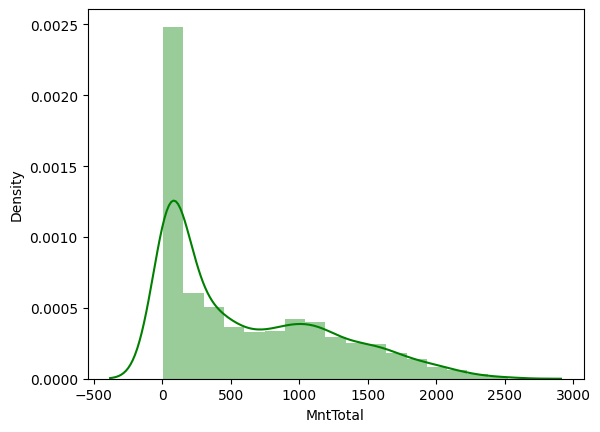

In [618]:
sns.distplot(sp['MntTotal'],color='green')

In [641]:
sp['Online_Purchase']

0       4
1       7
2       3
3       1
4       3
       ..
2235    5
2236    1
2237    6
2238    5
2239    8
Name: Online_Purchase, Length: 2205, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_13148\3608469569.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nontarget['MntTotal'],color='green')


<Axes: xlabel='MntTotal', ylabel='Density'>

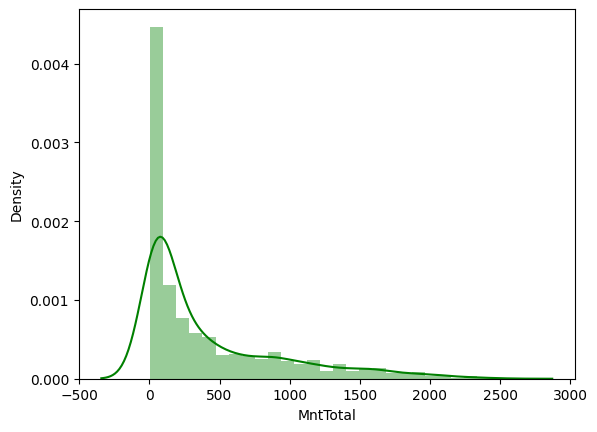